In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig

In [2]:
def Flipping(arr):
    temp = [[],[]]
    for i in range(len(arr[0])):
        temp[0].append(arr[0][i]*-1)
        temp[1].append(arr[1][i])
    arr = np.asarray(temp)
    arr = arr.T
    arr = arr[np.argsort(arr[:,0])]
    arr = arr.T
    return arr

In [13]:
FH_neon_raw = np.asarray(pd.read_csv('Ne.csv')).T

In [46]:
neon_array = FH_neon_raw

In [21]:
neon_array[1] = sig.savgol_filter(neon_array[1], 51, 10)

In [48]:
temp = [[],[]]
for i in range(len(neon_array[0])):
    temp[0].append(neon_array[0][i])
    temp[1].append(-neon_array[1][i])

In [49]:
# normalization
def normalize(arr,xlim,ylim,xstart,ystart):
    temp = [[],[]]
    for i in range(len(arr[0])):
        xmin = min(arr[0])
        xmax = max(arr[0])
        ymin = min(arr[1])
        ymax = max(arr[1])
        temp[0].append((arr[0][i] - xmin)/(xmax - xmin)*(xlim-xstart)+xstart)
        temp[1].append((arr[1][i] - ymin)/(ymax - ymin)*(ylim-ystart)+ystart)
    arr = np.asarray(temp)
    arr = arr.T
    arr = arr[np.argsort(arr[:,0])]
    arr = arr.T
    return arr

In [50]:
neon_array_n = normalize(neon_array)

Text(0.5, 1.0, 'Neon PDA')

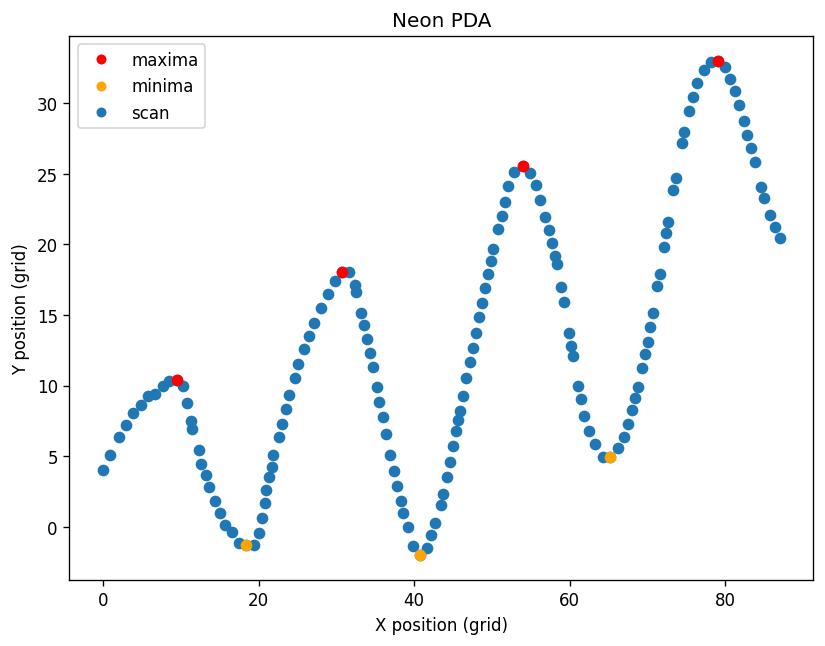

In [171]:
plt.figure(figsize=(8,6), dpi=120)
neon_peaks = sig.find_peaks(neon_array[1], prominence=(0.01,1))[0]
plt.scatter(neon_array_n[0], neon_array_n[1])
for i in neon_peaks:
    plt.scatter(neon_array_n[0][i], neon_array_n[1][i], color='red')

neon_min = sig.find_peaks(temp[1], prominence=(0.01,1))[0]
for i in neon_min:
    plt.scatter(neon_array_n[0][i], neon_array_n[1][i], color='orange')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='maxima',markerfacecolor='red', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='minima',markerfacecolor='orange', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='scan',markerfacecolor='#1f77b4', markersize=7)]
plt.legend(handles=legend_elements)
plt.xlabel("X position (grid)")
plt.ylabel("Y position (grid)")
plt.title("Neon PDA")




In [54]:
FH_DNe_raw = np.asarray(pd.read_csv('DNe.csv')).T

Text(0.5, 1.0, 'Neon Lock-in')

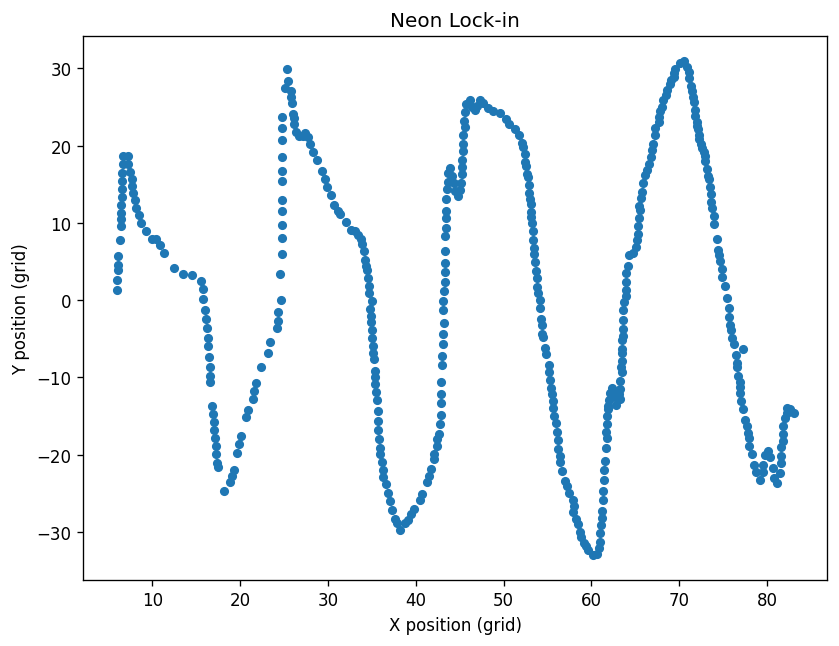

In [79]:
plt.figure(figsize=(8,6), dpi=120)
Dne_array = FH_DNe_raw
Dne_array = normalize(Dne_array,83,31,6,-33)
plt.scatter(Dne_array[0], Dne_array[1],s=20)
plt.xlabel("X position (grid)")
plt.ylabel("Y position (grid)")
plt.title("Neon Lock-in")


In [62]:
FH_Hg_raw = np.asarray(pd.read_csv('hg.csv')).T

In [118]:
Hg_array = FH_Hg_raw
Hg_array_n = normalize(Hg_array,126,46,0,0)
hg_temp = [[],[]]
for i in range(len(Hg_array[0])):
    hg_temp[0].append(Hg_array[0][i])
    hg_temp[1].append(-Hg_array[1][i])

Text(0.5, 1.0, 'Mercury PDA')

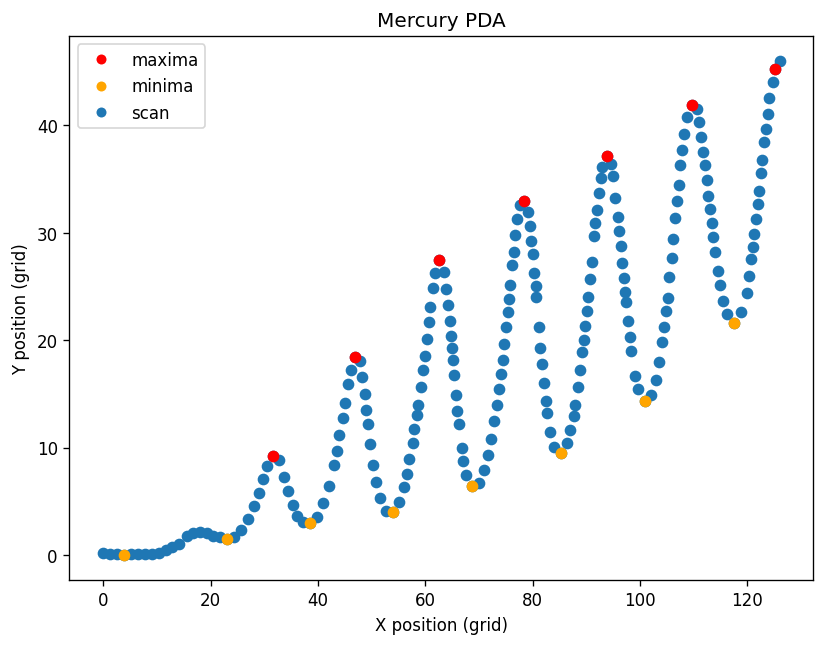

In [170]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='maxima',markerfacecolor='red', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='minima',markerfacecolor='orange', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='scan',markerfacecolor='#1f77b4', markersize=7)]

hg_peak = sig.find_peaks(Hg_array[1], distance=16, threshold=0.0004)[0]
plt.figure(figsize=(8,6), dpi=120)
plt.scatter(Hg_array_n[0], Hg_array_n[1])
for i in hg_peak:
    plt.scatter(Hg_array_n[0][i], Hg_array_n[1][i], color='red')

hg_min = sig.find_peaks(hg_temp[1], distance=10, threshold=0.0001)[0]
for i in hg_min:
    plt.scatter(Hg_array_n[0][i], Hg_array_n[1][i], color='orange')
plt.legend(handles=legend_elements)
plt.xlabel("X position (grid)")
plt.ylabel("Y position (grid)")
plt.title("Mercury PDA")

In [149]:
Dhg_raw = np.asarray(pd.read_csv('Dhg.csv')).T
Dhg_raw_n = normalize(Dhg_raw,126,7,0,-9)

Text(0.5, 1.0, 'Mercury Lock-in')

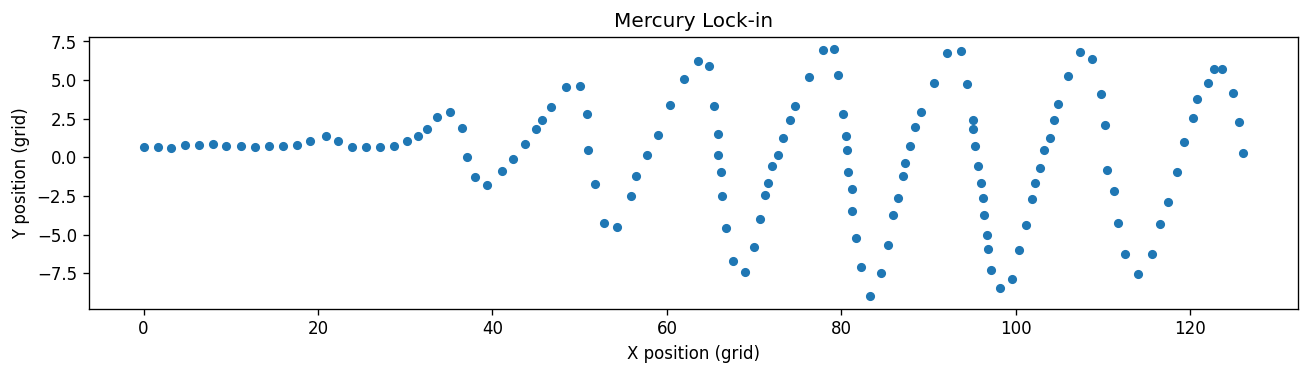

In [152]:
plt.figure(figsize=(13,3), dpi=120)
plt.scatter(Dhg_raw_n[0], Dhg_raw_n[1],s=20)
plt.xlabel("X position (grid)")
plt.ylabel("Y position (grid)")
plt.title("Mercury Lock-in")